In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from keras import regularizers
import sklearn
from sklearn import svm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import auto_regression as ar

Using TensorFlow backend.


In [2]:
#train
#test
#load data
path = 'C:/Users/mys12/Desktop/northeastern/summer2018/data_Robust_Fingerprinting-master/DISTRIBUTED_OPENSOURCE/FINGERPRINTING_DB'

test_rss = pd.read_csv(path + '/Training_rss_21Aug17.csv', header = 0)
test_coord = pd.read_csv(path + '/Training_coordinates_21Aug17.csv', header = 0)
test_rss = test_rss.replace(100, 0)

train_rss = pd.read_csv(path + '/Test_rss_21Aug17.csv', header = 0)
train_coord = pd.read_csv(path + '/Test_coordinates_21Aug17.csv', header = 0)
train_rss = train_rss.replace(100, 0)

In [3]:
train = pd.concat([train_rss, train_coord], axis=1, ignore_index=True)
test = pd.concat([test_rss, test_coord], axis=1, ignore_index=True)
train = np.asarray(train)
test = np.asarray(test)

# first floor
train1 = train[train[:,-1]==0.0]
normalizer = preprocessing.Normalizer().fit(train1[:,:-3])
train1_r=normalizer.transform(train1[:,:-3])
train1_c=train1[:,-3:-1]
print(train1_r.shape[1])

test1 = test[test[:,-1]==0.0]
test1_r=normalizer.transform(test1[:,:-3])
test1_c=test1[:,-3:-1]

992


In [4]:
def predata(rss, locations):
    # the origin of the room
    origin = np.amin(locations,axis=0)
    #size of the room
    room_size = np.amax(locations, axis=0)-origin
    # position respect to origin
    train_Yy = locations - origin
    train_Xx = np.asarray(rss, dtype=np.float64)
    return train_Xx, train_Yy

In [5]:
def train_val(rss, locations):
    train_Xx, train_Yy = predata(rss, locations)
    train_x, val_x, train_y, val_y = train_test_split(train_Xx, train_Yy, test_size=0.25)
    return train_x, val_x, train_y, val_y

In [6]:
def accuracy(predictions, labels):
    error = np.sqrt(np.sum((predictions - labels)**2, 1))
    return error, np.mean(error)

In [15]:
def classifier1():
    model = Sequential()
    model.add(Dense(256, input_dim=992, activation='relu', bias=True))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', bias=True))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', bias=True))
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    return model

In [38]:
def classifier2():
    model = Sequential()
    model.add(Dense(128, input_dim=992, activation='relu', bias=True))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', bias=True))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', bias=True))
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    return model

In [22]:
train_x, train_y = predata(train1_r, train1_c)
train_X, val_X, train_Y, val_Y = train_val(train_x, train_y)
test_x, test_y = predata(test1_r, test1_c)

In [23]:
nb_epochs =500
batch_size = 64
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=60, verbose=0, mode='auto')
Model_best= keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [24]:
model1 = classifier1()
model1.fit(train_X, train_Y, validation_data=(val_X, val_Y), nb_epoch=nb_epochs, callbacks=[earlyStopping, Model_best], batch_size=batch_size)
pre_Y1 = model1.predict(train_x)
pre_Y1_t = model1.predict(test_x)

C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=992, activation="relu", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", use_bias=True)`
  """
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="linear", use_bias=True)`
  import sys
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 948 samples, validate on 316 samples
Epoch 1/500
948/948 [==============================] - 0s - loss: 4651.2934 - acc: 0.8734 - val_loss: 4329.0419 - val_acc: 0.9399
Epoch 2/500
948/948 [==============================] - 0s - loss: 4219.0155 - acc: 0.9451 - val_loss: 3533.3984 - val_acc: 0.9399
Epoch 3/500
948/948 [==============================] - 0s - loss: 2988.2144 - acc: 0.9451 - val_loss: 1911.7521 - val_acc: 0.9399
Epoch 4/500
948/948 [==============================] - 0s - loss: 1452.6399 - acc: 0.9451 - val_loss: 931.4458 - val_acc: 0.9399
Epoch 5/500
948/948 [==============================] - 0s - loss: 866.4513 - acc: 0.9451 - val_loss: 624.6454 - val_acc: 0.9399
Epoch 6/500
948/948 [==============================] - 0s - loss: 614.1351 - acc: 0.9451 - val_loss: 445.2326 - val_acc: 0.9399
Epoch 7/500
948/948 [==============================] - 0s - loss: 469.1047 - acc: 0.9451 - val_loss: 339.6922 - val_acc: 0.9399
Epoch 8/500
948/948 [==============================

948/948 [==============================] - 0s - loss: 128.6985 - acc: 0.9631 - val_loss: 58.5470 - val_acc: 0.9652
Epoch 65/500
948/948 [==============================] - 0s - loss: 127.4438 - acc: 0.9631 - val_loss: 58.5915 - val_acc: 0.9652
Epoch 66/500
948/948 [==============================] - 0s - loss: 132.7708 - acc: 0.9631 - val_loss: 63.2879 - val_acc: 0.9684
Epoch 67/500
948/948 [==============================] - 0s - loss: 125.6182 - acc: 0.9557 - val_loss: 60.1123 - val_acc: 0.9652
Epoch 68/500
948/948 [==============================] - 0s - loss: 137.0949 - acc: 0.9620 - val_loss: 60.9695 - val_acc: 0.9652
Epoch 69/500
948/948 [==============================] - 0s - loss: 124.4719 - acc: 0.9631 - val_loss: 61.3723 - val_acc: 0.9652
Epoch 70/500
948/948 [==============================] - 0s - loss: 125.9773 - acc: 0.9631 - val_loss: 61.7768 - val_acc: 0.9652
Epoch 71/500
948/948 [==============================] - 0s - loss: 132.8722 - acc: 0.9599 - val_loss: 63.4823 - val_a

948/948 [==============================] - 0s - loss: 104.9376 - acc: 0.9641 - val_loss: 54.7383 - val_acc: 0.9684
Epoch 128/500
948/948 [==============================] - 0s - loss: 112.5751 - acc: 0.9652 - val_loss: 52.1396 - val_acc: 0.9652
Epoch 129/500
948/948 [==============================] - 0s - loss: 111.9271 - acc: 0.9705 - val_loss: 54.7664 - val_acc: 0.9652
Epoch 130/500
948/948 [==============================] - 0s - loss: 100.1923 - acc: 0.9684 - val_loss: 53.4287 - val_acc: 0.9684
Epoch 131/500
948/948 [==============================] - 0s - loss: 116.7312 - acc: 0.9673 - val_loss: 58.7610 - val_acc: 0.9684
Epoch 132/500
948/948 [==============================] - 0s - loss: 103.1706 - acc: 0.9736 - val_loss: 56.1978 - val_acc: 0.9684
Epoch 133/500
948/948 [==============================] - 0s - loss: 109.5507 - acc: 0.9652 - val_loss: 55.8284 - val_acc: 0.9652
Epoch 134/500
948/948 [==============================] - 0s - loss: 101.3405 - acc: 0.9715 - val_loss: 60.7938 

948/948 [==============================] - 0s - loss: 94.9870 - acc: 0.9694 - val_loss: 49.9323 - val_acc: 0.9620
Epoch 191/500
948/948 [==============================] - 0s - loss: 101.1697 - acc: 0.9747 - val_loss: 51.6300 - val_acc: 0.9620
Epoch 192/500
948/948 [==============================] - 0s - loss: 97.7022 - acc: 0.9778 - val_loss: 51.1467 - val_acc: 0.9620
Epoch 193/500
948/948 [==============================] - 0s - loss: 97.0563 - acc: 0.9684 - val_loss: 53.7758 - val_acc: 0.9620
Epoch 194/500
948/948 [==============================] - 0s - loss: 95.2790 - acc: 0.9641 - val_loss: 52.7400 - val_acc: 0.9620
Epoch 195/500
948/948 [==============================] - 0s - loss: 96.6480 - acc: 0.9662 - val_loss: 50.9044 - val_acc: 0.9620
Epoch 196/500
948/948 [==============================] - 0s - loss: 103.2271 - acc: 0.9757 - val_loss: 51.0776 - val_acc: 0.9620
Epoch 197/500
948/948 [==============================] - 0s - loss: 94.8217 - acc: 0.9736 - val_loss: 57.1446 - val_

948/948 [==============================] - 0s - loss: 91.5547 - acc: 0.9778 - val_loss: 50.2570 - val_acc: 0.9620
Epoch 255/500
948/948 [==============================] - 0s - loss: 94.3749 - acc: 0.9757 - val_loss: 53.0242 - val_acc: 0.9589
Epoch 256/500
948/948 [==============================] - 0s - loss: 81.8537 - acc: 0.9789 - val_loss: 54.8643 - val_acc: 0.9620
Epoch 257/500
948/948 [==============================] - 0s - loss: 85.0769 - acc: 0.9694 - val_loss: 50.8683 - val_acc: 0.9620
Epoch 258/500
948/948 [==============================] - 0s - loss: 93.5884 - acc: 0.9726 - val_loss: 48.0459 - val_acc: 0.9589
Epoch 259/500
948/948 [==============================] - 0s - loss: 95.1771 - acc: 0.9673 - val_loss: 50.0466 - val_acc: 0.9620
Epoch 260/500
948/948 [==============================] - 0s - loss: 90.3564 - acc: 0.9778 - val_loss: 53.4736 - val_acc: 0.9620
Epoch 261/500
948/948 [==============================] - 0s - loss: 92.4337 - acc: 0.9736 - val_loss: 52.5142 - val_ac

948/948 [==============================] - 0s - loss: 89.4341 - acc: 0.9715 - val_loss: 51.1468 - val_acc: 0.9652
Epoch 319/500
948/948 [==============================] - 0s - loss: 86.3106 - acc: 0.9694 - val_loss: 48.9064 - val_acc: 0.9620


NameError: name 'test_Y' is not defined

In [25]:
error_1, accuracy_1 = accuracy(pre_Y1_t, test_y)
print(accuracy_1)

9.90593815437


In [39]:
model2 = classifier2()
model2.fit(train_X, train_Y, validation_data=(val_X, val_Y), nb_epoch=nb_epochs, batch_size=batch_size)
pre_Y2 = model2.predict(train_x)
pre_Y2_t = model2.predict(test_x)


C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=992, activation="relu", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", use_bias=True)`
  """
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="linear", use_bias=True)`
  import sys
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 948 samples, validate on 316 samples
Epoch 1/500
948/948 [==============================] - 0s - loss: 4685.6197 - acc: 0.6783 - val_loss: 4430.0679 - val_acc: 0.9399
Epoch 2/500
948/948 [==============================] - 0s - loss: 4483.7117 - acc: 0.9409 - val_loss: 4071.3458 - val_acc: 0.9399
Epoch 3/500
948/948 [==============================] - 0s - loss: 3895.0925 - acc: 0.9430 - val_loss: 3176.6536 - val_acc: 0.9399
Epoch 4/500
948/948 [==============================] - 0s - loss: 2735.5318 - acc: 0.9462 - val_loss: 1842.6263 - val_acc: 0.9399
Epoch 5/500
948/948 [==============================] - 0s - loss: 1506.2684 - acc: 0.9441 - val_loss: 1025.4374 - val_acc: 0.9399
Epoch 6/500
948/948 [==============================] - 0s - loss: 980.2015 - acc: 0.9451 - val_loss: 698.2705 - val_acc: 0.9399
Epoch 7/500
948/948 [==============================] - 0s - loss: 714.4702 - acc: 0.9451 - val_loss: 523.1782 - val_acc: 0.9399
Epoch 8/500
948/948 [===========================

948/948 [==============================] - 0s - loss: 163.5337 - acc: 0.9589 - val_loss: 70.5768 - val_acc: 0.9620
Epoch 65/500
948/948 [==============================] - 0s - loss: 154.3003 - acc: 0.9515 - val_loss: 65.8937 - val_acc: 0.9620
Epoch 66/500
948/948 [==============================] - 0s - loss: 154.6771 - acc: 0.9568 - val_loss: 64.8111 - val_acc: 0.9620
Epoch 67/500
948/948 [==============================] - 0s - loss: 157.0703 - acc: 0.9557 - val_loss: 69.0680 - val_acc: 0.9620
Epoch 68/500
948/948 [==============================] - 0s - loss: 155.4268 - acc: 0.9589 - val_loss: 66.3224 - val_acc: 0.9620
Epoch 69/500
948/948 [==============================] - 0s - loss: 135.8778 - acc: 0.9589 - val_loss: 63.0476 - val_acc: 0.9620
Epoch 70/500
948/948 [==============================] - 0s - loss: 154.8327 - acc: 0.9589 - val_loss: 68.9678 - val_acc: 0.9620
Epoch 71/500
948/948 [==============================] - 0s - loss: 150.3168 - acc: 0.9589 - val_loss: 66.5456 - val_a

948/948 [==============================] - 0s - loss: 129.7247 - acc: 0.9715 - val_loss: 56.3329 - val_acc: 0.9652
Epoch 128/500
948/948 [==============================] - 0s - loss: 127.7033 - acc: 0.9620 - val_loss: 57.2282 - val_acc: 0.9652
Epoch 129/500
948/948 [==============================] - 0s - loss: 125.9101 - acc: 0.9610 - val_loss: 64.5523 - val_acc: 0.9652
Epoch 130/500
948/948 [==============================] - 0s - loss: 149.4532 - acc: 0.9641 - val_loss: 58.1511 - val_acc: 0.9620
Epoch 131/500
948/948 [==============================] - 0s - loss: 131.6412 - acc: 0.9610 - val_loss: 55.1241 - val_acc: 0.9652
Epoch 132/500
948/948 [==============================] - 0s - loss: 126.4781 - acc: 0.9652 - val_loss: 57.9562 - val_acc: 0.9620
Epoch 133/500
948/948 [==============================] - 0s - loss: 123.7434 - acc: 0.9684 - val_loss: 59.1601 - val_acc: 0.9652
Epoch 134/500
948/948 [==============================] - 0s - loss: 125.6188 - acc: 0.9662 - val_loss: 52.7141 

948/948 [==============================] - 0s - loss: 111.9189 - acc: 0.9641 - val_loss: 51.4188 - val_acc: 0.9652
Epoch 191/500
948/948 [==============================] - 0s - loss: 124.1251 - acc: 0.9620 - val_loss: 56.2038 - val_acc: 0.9652
Epoch 192/500
948/948 [==============================] - 0s - loss: 119.4005 - acc: 0.9684 - val_loss: 55.9317 - val_acc: 0.9652
Epoch 193/500
948/948 [==============================] - 0s - loss: 119.6078 - acc: 0.9684 - val_loss: 53.1551 - val_acc: 0.9652
Epoch 194/500
948/948 [==============================] - 0s - loss: 111.0216 - acc: 0.9620 - val_loss: 53.5418 - val_acc: 0.9652
Epoch 195/500
948/948 [==============================] - 0s - loss: 116.7057 - acc: 0.9726 - val_loss: 53.7140 - val_acc: 0.9652
Epoch 196/500
948/948 [==============================] - 0s - loss: 120.5940 - acc: 0.9694 - val_loss: 56.6339 - val_acc: 0.9652
Epoch 197/500
948/948 [==============================] - 0s - loss: 121.4248 - acc: 0.9747 - val_loss: 54.5922 

948/948 [==============================] - 0s - loss: 99.7867 - acc: 0.9652 - val_loss: 50.0425 - val_acc: 0.9652
Epoch 254/500
948/948 [==============================] - 0s - loss: 102.4052 - acc: 0.9684 - val_loss: 52.6269 - val_acc: 0.9715
Epoch 255/500
948/948 [==============================] - 0s - loss: 104.0083 - acc: 0.9631 - val_loss: 53.4547 - val_acc: 0.9652
Epoch 256/500
948/948 [==============================] - 0s - loss: 100.9392 - acc: 0.9726 - val_loss: 54.5019 - val_acc: 0.9684
Epoch 257/500
948/948 [==============================] - 0s - loss: 96.0298 - acc: 0.9652 - val_loss: 52.9245 - val_acc: 0.9684
Epoch 258/500
948/948 [==============================] - 0s - loss: 100.8451 - acc: 0.9705 - val_loss: 51.0921 - val_acc: 0.9684
Epoch 259/500
948/948 [==============================] - 0s - loss: 104.1527 - acc: 0.9810 - val_loss: 56.9290 - val_acc: 0.9652
Epoch 260/500
948/948 [==============================] - 0s - loss: 97.9216 - acc: 0.9705 - val_loss: 51.1574 - v

948/948 [==============================] - 0s - loss: 93.5253 - acc: 0.9684 - val_loss: 50.1733 - val_acc: 0.9652
Epoch 317/500
948/948 [==============================] - 0s - loss: 87.4145 - acc: 0.9800 - val_loss: 51.5913 - val_acc: 0.9620
Epoch 318/500
948/948 [==============================] - 0s - loss: 93.5038 - acc: 0.9789 - val_loss: 54.6026 - val_acc: 0.9620
Epoch 319/500
948/948 [==============================] - 0s - loss: 95.8323 - acc: 0.9800 - val_loss: 50.8642 - val_acc: 0.9620
Epoch 320/500
948/948 [==============================] - 0s - loss: 85.8730 - acc: 0.9705 - val_loss: 51.2903 - val_acc: 0.9684
Epoch 321/500
948/948 [==============================] - 0s - loss: 99.2364 - acc: 0.9747 - val_loss: 51.1247 - val_acc: 0.9684
Epoch 322/500
948/948 [==============================] - 0s - loss: 85.2793 - acc: 0.9673 - val_loss: 55.0716 - val_acc: 0.9715
Epoch 323/500
948/948 [==============================] - 0s - loss: 93.4090 - acc: 0.9673 - val_loss: 49.6571 - val_ac

948/948 [==============================] - 0s - loss: 87.6562 - acc: 0.9726 - val_loss: 53.3380 - val_acc: 0.9620
Epoch 381/500
948/948 [==============================] - 0s - loss: 85.3770 - acc: 0.9705 - val_loss: 49.8571 - val_acc: 0.9652.96
Epoch 382/500
948/948 [==============================] - 0s - loss: 90.5464 - acc: 0.9694 - val_loss: 47.1458 - val_acc: 0.9652
Epoch 383/500
948/948 [==============================] - 0s - loss: 86.0502 - acc: 0.9726 - val_loss: 47.9001 - val_acc: 0.9684
Epoch 384/500
948/948 [==============================] - 0s - loss: 87.1934 - acc: 0.9684 - val_loss: 48.6770 - val_acc: 0.9620
Epoch 385/500
948/948 [==============================] - 0s - loss: 90.5475 - acc: 0.9705 - val_loss: 48.2260 - val_acc: 0.9620
Epoch 386/500
948/948 [==============================] - 0s - loss: 93.1939 - acc: 0.9652 - val_loss: 47.9715 - val_acc: 0.9620
Epoch 387/500
948/948 [==============================] - 0s - loss: 85.6697 - acc: 0.9694 - val_loss: 48.7701 - val

948/948 [==============================] - 0s - loss: 80.3069 - acc: 0.9641 - val_loss: 45.8629 - val_acc: 0.9652
Epoch 445/500
948/948 [==============================] - 0s - loss: 86.3648 - acc: 0.9778 - val_loss: 45.7405 - val_acc: 0.9652
Epoch 446/500
948/948 [==============================] - 0s - loss: 81.9354 - acc: 0.9694 - val_loss: 46.4658 - val_acc: 0.9652
Epoch 447/500
948/948 [==============================] - 0s - loss: 85.4379 - acc: 0.9652 - val_loss: 45.8596 - val_acc: 0.9652
Epoch 448/500
948/948 [==============================] - 0s - loss: 87.1154 - acc: 0.9684 - val_loss: 53.2628 - val_acc: 0.9684
Epoch 449/500
948/948 [==============================] - 0s - loss: 78.3312 - acc: 0.9673 - val_loss: 48.3219 - val_acc: 0.9652
Epoch 450/500
948/948 [==============================] - 0s - loss: 82.1744 - acc: 0.9726 - val_loss: 46.8122 - val_acc: 0.9652
Epoch 451/500
948/948 [==============================] - 0s - loss: 90.8088 - acc: 0.9726 - val_loss: 48.1222 - val_ac

In [40]:
error_2, accuracy_2 = accuracy(pre_Y2_t, test_y)
print(accuracy_2)

9.75002895707


In [47]:
import auto_regression as ar
model3=ar.regression(train_X, train_Y, val_X, val_Y)
pre_Y3=model3.predict(train_x)
pre_Y3_t = model3.predict(test_x)

C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=992, activation="relu", use_bias=True)`
  model.add(Dense(512, input_dim=input_size, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", use_bias=True)`
  model.add(Dense(256, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=256, activation="relu", use_bias=True)`
  e.add(Dense(512, input_dim=256, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(992, activation="relu", use_bias=True)`
  e

Epoch 1/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 2/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 3/500
948/948 [==============================] - 0s - loss: 0.0010     - ETA: 0s - loss: 0.00
Epoch 4/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 5/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 6/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 7/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 8/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 9/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 10/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 11/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 12/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 13/500
948/948 [=================

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 105/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 106/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 107/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 108/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 109/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 110/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 111/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 112/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 113/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 114/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 115/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 116/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 207/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 208/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 209/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 210/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 211/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 212/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 213/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 214/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 215/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 216/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 217/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 218/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 309/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 310/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 311/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 312/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 313/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 314/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 315/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 316/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 317/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 318/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 319/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 320/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 411/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 412/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 413/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 414/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 415/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 416/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 417/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 418/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 419/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 420/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 421/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 422/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 234.2421 - val_loss: 164.8859
Epoch 10/500
948/948 [==============================] - 0s - loss: 211.9776 - val_loss: 159.6386
Epoch 11/500
948/948 [==============================] - 0s - loss: 209.2670 - val_loss: 144.2566
Epoch 12/500
948/948 [==============================] - 0s - loss: 173.6647 - val_loss: 110.6576
Epoch 13/500
948/948 [==============================] - 0s - loss: 159.2427 - val_loss: 85.7728
Epoch 14/500
948/948 [==============================] - 0s - loss: 147.0450 - val_loss: 87.5604
Epoch 15/500
948/948 [==============================] - 0s - loss: 137.4960 - val_loss: 102.9072
Epoch 16/500
948/948 [==============================] - 0s - loss: 139.2737 - val_loss: 70.8324
Epoch 17/500
948/948 [==============================] - 0s - loss: 132.7732 - val_loss: 74.7630
Epoch 18/500
948/948 [==============================] - 0s - loss: 130.6713 - val_loss: 82.3859
Epoch 19/500
948/948 [==========================

948/948 [==============================] - 0s - loss: 78.2813 - val_loss: 60.1192
Epoch 95/500
948/948 [==============================] - 0s - loss: 81.3290 - val_loss: 67.8900
Epoch 96/500
948/948 [==============================] - 0s - loss: 84.9146 - val_loss: 61.2102
Epoch 97/500
948/948 [==============================] - 0s - loss: 83.7703 - val_loss: 71.7736
Epoch 98/500
948/948 [==============================] - 0s - loss: 84.7309 - val_loss: 71.2714
Epoch 99/500
948/948 [==============================] - 0s - loss: 89.0547 - val_loss: 57.9939
Epoch 100/500
948/948 [==============================] - 0s - loss: 84.1413 - val_loss: 61.9636
Epoch 101/500
948/948 [==============================] - 0s - loss: 74.7782 - val_loss: 57.4295
Epoch 102/500
948/948 [==============================] - 0s - loss: 81.3201 - val_loss: 57.4142
Epoch 103/500
948/948 [==============================] - 0s - loss: 76.4404 - val_loss: 59.2411
Epoch 104/500
948/948 [==============================] - 0s

In [48]:
error_3, accuracy_3 = accuracy(pre_Y3_t, test_y)
print(accuracy_3)

9.14330623882


In [57]:
import regular_regression as rr
model4 = rr.train_model(train_X, train_Y, val_X, val_Y)
pre_Y4=model4.predict(train_x)
pre_Y4_t = model4.predict(test_x)

Train on 948 samples, validate on 316 samples
Epoch 1/1000
948/948 [==============================] - 0s - loss: 4711.5369 - val_loss: 4444.8905
Epoch 2/1000
948/948 [==============================] - 0s - loss: 4475.4506 - val_loss: 4025.0753
Epoch 3/1000
948/948 [==============================] - 0s - loss: 3776.6994 - val_loss: 2991.5913
Epoch 4/1000
948/948 [==============================] - 0s - loss: 2469.8507 - val_loss: 1608.7221
Epoch 5/1000
948/948 [==============================] - 0s - loss: 1320.9233 - val_loss: 966.7906
Epoch 6/1000
948/948 [==============================] - 0s - loss: 845.2442 - val_loss: 672.1934
Epoch 7/1000
948/948 [==============================] - 0s - loss: 627.2127 - val_loss: 507.9732
Epoch 8/1000
948/948 [==============================] - 0s - loss: 489.0646 - val_loss: 406.6759: 513.2
Epoch 9/1000
948/948 [==============================] - 0s - loss: 412.8829 - val_loss: 349.1451
Epoch 10/1000
948/948 [==============================] - 0s - los

948/948 [==============================] - 0s - loss: 107.6413 - val_loss: 84.3629
Epoch 85/1000
948/948 [==============================] - 0s - loss: 107.7157 - val_loss: 84.2955
Epoch 86/1000
948/948 [==============================] - 0s - loss: 107.1807 - val_loss: 84.1568
Epoch 87/1000
948/948 [==============================] - 0s - loss: 108.6113 - val_loss: 82.1325
Epoch 88/1000
948/948 [==============================] - 0s - loss: 106.2322 - val_loss: 82.4069
Epoch 89/1000
948/948 [==============================] - 0s - loss: 106.6840 - val_loss: 83.7326
Epoch 90/1000
948/948 [==============================] - 0s - loss: 102.4690 - val_loss: 81.5721
Epoch 91/1000
948/948 [==============================] - 0s - loss: 106.3217 - val_loss: 82.9024
Epoch 92/1000
948/948 [==============================] - 0s - loss: 100.9556 - val_loss: 81.7856
Epoch 93/1000
948/948 [==============================] - 0s - loss: 105.3462 - val_loss: 82.9760
Epoch 94/1000
948/948 [=====================

948/948 [==============================] - 0s - loss: 86.1771 - val_loss: 73.1324
Epoch 169/1000
948/948 [==============================] - 0s - loss: 94.4506 - val_loss: 74.0254
Epoch 170/1000
948/948 [==============================] - 0s - loss: 86.8216 - val_loss: 73.3839
Epoch 171/1000
948/948 [==============================] - 0s - loss: 91.6613 - val_loss: 69.9406
Epoch 172/1000
948/948 [==============================] - 0s - loss: 88.0400 - val_loss: 71.3459
Epoch 173/1000
948/948 [==============================] - 0s - loss: 91.4310 - val_loss: 72.1962
Epoch 174/1000
948/948 [==============================] - 0s - loss: 86.9430 - val_loss: 72.5626
Epoch 175/1000
948/948 [==============================] - 0s - loss: 89.4021 - val_loss: 71.3508
Epoch 176/1000
948/948 [==============================] - 0s - loss: 90.2545 - val_loss: 73.0641
Epoch 177/1000
948/948 [==============================] - 0s - loss: 89.6726 - val_loss: 71.4251
Epoch 178/1000
948/948 [=====================

948/948 [==============================] - 0s - loss: 77.0246 - val_loss: 66.3950
Epoch 253/1000
948/948 [==============================] - 0s - loss: 80.7566 - val_loss: 65.3601
Epoch 254/1000
948/948 [==============================] - 0s - loss: 80.2236 - val_loss: 65.8161
Epoch 255/1000
948/948 [==============================] - 0s - loss: 80.5705 - val_loss: 65.8343
Epoch 256/1000
948/948 [==============================] - 0s - loss: 78.9861 - val_loss: 66.9661
Epoch 257/1000
948/948 [==============================] - 0s - loss: 76.4471 - val_loss: 65.9123
Epoch 258/1000
948/948 [==============================] - 0s - loss: 77.5354 - val_loss: 66.1298
Epoch 259/1000
948/948 [==============================] - 0s - loss: 74.8908 - val_loss: 65.0619
Epoch 260/1000
948/948 [==============================] - 0s - loss: 76.1094 - val_loss: 65.0588
Epoch 261/1000
948/948 [==============================] - 0s - loss: 81.4087 - val_loss: 65.1517
Epoch 262/1000
948/948 [=====================

948/948 [==============================] - 0s - loss: 71.9902 - val_loss: 66.2161
Epoch 337/1000
948/948 [==============================] - 0s - loss: 76.5752 - val_loss: 65.3178
Epoch 338/1000
948/948 [==============================] - 0s - loss: 75.3029 - val_loss: 65.2451
Epoch 339/1000
948/948 [==============================] - 0s - loss: 75.6654 - val_loss: 64.9920
Epoch 340/1000
948/948 [==============================] - 0s - loss: 75.5053 - val_loss: 64.6995
Epoch 341/1000
948/948 [==============================] - 0s - loss: 79.6667 - val_loss: 65.5163
Epoch 342/1000
948/948 [==============================] - 0s - loss: 75.7105 - val_loss: 63.8665


In [58]:
error_4, accuracy_4 = accuracy(pre_Y4_t, test_y)
print(accuracy_4)

9.91457527759


In [97]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(train_x, train_y)
pre_Y5 = neigh.predict(train_x)
pre_Y5_t = neigh.predict(test_x)

In [98]:
error_5, accuracy_5 = accuracy(pre_Y5_t, test_y)
print(accuracy_5)

8.52908763973


In [82]:
def reshaped(predict):
    size = predict.shape[0]
    j = predict.reshape((2*size, 1))
    return j

In [99]:
pre_Y11 = reshaped(pre_Y1)
pre_Y21 = reshaped(pre_Y2)
pre_Y31 = reshaped(pre_Y3)
pre_Y41 = reshaped(pre_Y4)
pre_Y51 = reshaped(pre_Y5)
pre = np.column_stack((pre_Y11, pre_Y31, pre_Y41,pre_Y51))
pre_t = np.column_stack(((reshaped(pre_Y1_t), reshaped(pre_Y3_t), reshaped(pre_Y4_t),reshaped(pre_Y5_t))))

In [100]:
pre.shape[0]

2528

In [117]:
pre_t

array([[  99.82057953,  106.73368073,  111.86955261,  103.8625    ],
       [  33.96596146,   32.48423004,   40.55825424,   39.84818   ],
       [  88.95584106,   89.74806976,   87.9512558 ,   78.711     ],
       ..., 
       [  37.71389008,   34.77556229,   38.09966278,   36.90943   ],
       [  95.13024139,   94.94316864,   93.50708008,   85.954     ],
       [  28.88933372,   26.02934074,   27.99210358,   17.23793   ]])

In [110]:
# stacking model 1
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(pre, reshaped(train_y))
pred1 = lr.predict(pre_t)
e, a = accuracy(pred1.reshape((226,2)), test_y)
print(a)

8.45782568039


In [116]:
# stacking model 2
from sklearn.svm import LinearSVR
Lsvm = LinearSVR()
Lsvm.fit(pre, reshaped(train_y))
pred2 = Lsvm.predict(pre_t)
e2, a2 = accuracy(pred2.reshape((226,2)), test_y)
print(a2)

8.64381909306


C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
# stacking model 3
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(pre, reshaped(train_y))
pred3 = neigh.predict(pre_t)
e3, a3 = accuracy(pred3.reshape((226,2)), test_y)
print(a3)

8.70886094388


6.96807629376


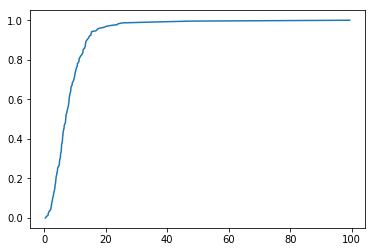

In [109]:
print(np.median(e))
error_sorted= np.sort(e)
p = 1. *np.arange(len(e))/(len(e)-1)
plt.plot(error_sorted, p)
plt.show()